In [2]:
# import packages and modules
from pandas_gbq import read_gbq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# turn off pandas maximum column width and maximum number of rows
pd.set_option('max_colwidth', None)
pd.set_option("display.max_rows", None)

### Preview the international_debt table

In [4]:
query = """
SELECT *
FROM bigquery-public-data.world_bank_intl_debt.international_debt
LIMIT 5;
"""

preview_int_debt = read_gbq(query, project_id=project_id)

preview_int_debt

Downloading: 100%|██████████|


,country_name,country_code,indicator_name,indicator_code,value,year
0,Chad,TCD,GNI (current US$),NY.GNP.MKTP.CD,NaN,<NA>
1,Chad,TCD,GNI (current US$),NY.GNP.MKTP.CD,NaN,<NA>
2,Chad,TCD,GNI (current US$),NY.GNP.MKTP.CD,NaN,<NA>
3,Chad,TCD,GNI (current US$),NY.GNP.MKTP.CD,NaN,<NA>
4,Chad,TCD,GNI (current US$),NY.GNP.MKTP.CD,NaN,<NA>


### What is the total number of rows?

In [6]:
query = """
SELECT COUNT(*) AS total_rows
FROM bigquery-public-data.world_bank_intl_debt.international_debt;
"""

total_rows = read_gbq(query, project_id=project_id)

total_rows

Downloading: 100%|██████████|


,total_rows
0,3284415


### What is the total number of rows with null year values?

In [8]:
query = """
SELECT COUNT(*) AS total_null_year_rows
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE year IS NULL;
"""

total_null_year_rows = read_gbq(query, project_id=project_id)

total_null_year_rows

Downloading: 100%|██████████|


,total_null_year_rows
0,3284415


### What is the total number of rows with null debt values?

In [10]:
query = """
SELECT COUNT(*) AS total_null_debt_rows
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE value IS NULL;
"""

total_null_debt_rows = read_gbq(query, project_id=project_id)

total_null_debt_rows

Downloading: 100%|██████████|


,total_null_debt_rows
0,3080295


### What is the total number of rows with non-null debt values?

In [12]:
query = """
SELECT COUNT(*) AS total_non_null_debt_rows
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE value IS NOT NULL;
"""

total_non_null_debt_rows = read_gbq(query, project_id=project_id)

total_non_null_debt_rows

Downloading: 100%|██████████|


,total_non_null_debt_rows
0,204120


### What is the total number of rows with non-null and non-zero debt values?

In [14]:
query = """
SELECT COUNT(*) AS total_non_null_non_zero_debt_rows
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE 
    value IS NOT NULL
    AND value <> 0;
"""

total_non_null_non_zero_debt_rows = read_gbq(query, project_id=project_id)

total_non_null_non_zero_debt_rows

Downloading: 100%|██████████|


,total_non_null_non_zero_debt_rows
0,138152


### How do the data look for a single country without null and zero debt values?

In [16]:
query = """
SELECT *
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    country_name='Chad'
    AND value IS NOT NULL
    AND value <> 0;
"""

chad_all_rows = read_gbq(query, project_id=project_id)

chad_all_rows.head(30)

Downloading: 100%|██████████|


,country_name,country_code,indicator_name,indicator_code,value,year
0,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
1,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
2,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
3,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
4,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
5,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
6,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
7,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
8,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
9,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>


### There are duplicate rows. What are the unique rows for Chad?

In [18]:
query = """
SELECT DISTINCT *
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    country_name='Chad'
    AND value IS NOT NULL
    AND value <> 0;
"""

chad_unique_rows = read_gbq(query, project_id=project_id)

chad_unique_rows

Downloading: 100%|██████████|


,country_name,country_code,indicator_name,indicator_code,value,year
0,Chad,TCD,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,51630506.9,<NA>
1,Chad,TCD,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,2880958.8,<NA>
2,Chad,TCD,"PPG, multilateral (AMT, current US$)",DT.AMT.MLAT.CD,46187853.7,<NA>
3,Chad,TCD,"PPG, multilateral (DIS, current US$)",DT.DIS.MLAT.CD,3863826.8,<NA>
4,Chad,TCD,"PPG, multilateral (INT, current US$)",DT.INT.MLAT.CD,8461452.2,<NA>
5,Chad,TCD,"PPG, official creditors (AMT, current US$)",DT.AMT.OFFT.CD,97818360.6,<NA>
6,Chad,TCD,"PPG, official creditors (DIS, current US$)",DT.DIS.OFFT.CD,3863826.8,<NA>
7,Chad,TCD,"PPG, official creditors (INT, current US$)",DT.INT.OFFT.CD,11342411.0,<NA>
8,Chad,TCD,"Disbursements on external debt, long-term (DIS, current US$)",DT.DIS.DLXF.CD,3863826.8,<NA>
9,Chad,TCD,"Interest payments on external debt, long-term (INT, current US$)",DT.INT.DLXF.CD,11342411.0,<NA>


### What is the total number of unique rows with non-null and non-zero debt values?

In [20]:
query = """
SELECT DISTINCT *
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    value IS NOT NULL
    AND value <> 0;
"""

all_unique_rows = read_gbq(query, project_id=project_id)

display(all_unique_rows.sort_values('country_name').head(20))

all_unique_rows.sort_values('country_name').shape

Downloading: 100%|██████████|


,country_name,country_code,indicator_name,indicator_code,value,year
1851,Afghanistan,AFG,"Interest payments on external debt, long-term (INT, current US$)",DT.INT.DLXF.CD,26582304.5,<NA>
2181,Afghanistan,AFG,"Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)",DT.AMT.DPNG.CD,680000.0,<NA>
406,Afghanistan,AFG,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,17386007.9,<NA>
1986,Afghanistan,AFG,"Principal repayments on external debt, long-term (AMT, current US$)",DT.AMT.DLXF.CD,110796286.8,<NA>
2429,Afghanistan,AFG,"Principal repayments on external debt, public and publicly guaranteed (PPG) (AMT, current US$)",DT.AMT.DPPG.CD,110116286.8,<NA>
1721,Afghanistan,AFG,"Disbursements on external debt, long-term (DIS, current US$)",DT.DIS.DLXF.CD,1480636.7,<NA>
666,Afghanistan,AFG,"PPG, multilateral (DIS, current US$)",DT.DIS.MLAT.CD,1480636.7,<NA>
1520,Afghanistan,AFG,"PPG, official creditors (INT, current US$)",DT.INT.OFFT.CD,26502304.5,<NA>
796,Afghanistan,AFG,"PPG, multilateral (INT, current US$)",DT.INT.MLAT.CD,9116296.6,<NA>
204,Afghanistan,AFG,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,63880573.3,<NA>


(2467, 6)

### What is the number of distinct countries and groups in the table?

In [22]:
query = """
SELECT COUNT(DISTINCT country_name) AS total_distinct_countries_groups
FROM bigquery-public-data.world_bank_intl_debt.international_debt;
"""

total_distinct_countries_groups = read_gbq(query, project_id=project_id)

total_distinct_countries_groups

Downloading: 100%|██████████|


,total_distinct_countries_groups
0,135


### What are the distinct countries and groups in the table?

In [24]:
query = """
SELECT DISTINCT country_name
FROM bigquery-public-data.world_bank_intl_debt.international_debt;
"""

distinct_countries_groups = read_gbq(query, project_id=project_id)

distinct_countries_groups

Downloading: 100%|██████████|


,country_name
0,Chad
1,Fiji
2,Mali
3,Peru
4,Togo
5,Benin
6,China
7,Gabon
8,Ghana
9,Haiti


### What are the distinct countries?

In [26]:
query = """
SELECT DISTINCT country_name
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    (country_name NOT LIKE '%income%' 
    AND country_name NOT LIKE '%UN classification'
    AND country_name NOT LIKE 'IDA only'
    AND country_name NOT LIKE 'South Asia');
"""

distinct_countries = read_gbq(query, project_id=project_id)

distinct_countries

Downloading: 100%|██████████|


,country_name
0,Chad
1,Fiji
2,Mali
3,Peru
4,Togo
5,Benin
6,China
7,Gabon
8,Ghana
9,Haiti


### What are the distinct groups?

In [28]:
query = """
SELECT DISTINCT country_name
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    (country_name LIKE '%income%' 
    OR country_name LIKE '%UN classification'
    OR country_name LIKE 'IDA only'
    OR country_name LIKE 'South Asia');
"""

distinct_groups = read_gbq(query, project_id=project_id)

distinct_groups

Downloading: 100%|██████████|


,country_name
0,IDA only
1,Low income
2,South Asia
3,Middle income
4,Low & middle income
5,Lower middle income
6,Upper middle income
7,Sub-Saharan Africa (excluding high income)
8,East Asia & Pacific (excluding high income)
9,Least developed countries: UN classification


### What are the top 10 countries in terms of total debt?

In [30]:
# DISTINCT value is extracted to ignore duplicate rows

query = """
SELECT
    country_name,
    SUM(DISTINCT value) AS total_debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    (country_name NOT LIKE '%income%' 
    AND country_name NOT LIKE '%UN classification'
    AND country_name NOT LIKE 'IDA only'
    AND country_name NOT LIKE 'South Asia')
GROUP BY country_name
ORDER BY total_debt DESC
LIMIT 10;
"""

highest_debt_countries = read_gbq(query, project_id=project_id)

highest_debt_countries

Downloading: 100%|██████████|


,country_name,total_debt
0,Mexico,1.117621e+11
1,India,7.909658e+10
2,Brazil,6.887453e+10
3,Russian Federation,6.466601e+10
4,Argentina,6.357673e+10
5,China,6.075786e+10
6,Turkey,6.061654e+10
7,Indonesia,5.047649e+10
8,Colombia,3.802160e+10
9,"Venezuela, RB",3.169062e+10


### What is the total debt owed (in trillions) by all the countries present in the table?

In [32]:
# DISTINCT value is extracted to ignore duplicate rows

query = """
SELECT
    ROUND(SUM(DISTINCT value) / 1E12, 2) AS total_debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    (country_name NOT LIKE '%income%' 
    AND country_name NOT LIKE '%UN classification'
    AND country_name NOT LIKE 'IDA only'
    AND country_name NOT LIKE 'South Asia');
"""

total_debt_trillions = read_gbq(query, project_id=project_id)

total_debt_trillions

Downloading: 100%|██████████|


,total_debt
0,1.05


### Explore the country_summary table

In [34]:
query = """
SELECT *
FROM bigquery-public-data.world_bank_intl_debt.country_summary;
"""

country_summary = read_gbq(query, project_id=project_id)

country_summary.head(2)

Downloading: 100%|██████████|


,country_code,short_name,table_name,long_name,two_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,...,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_Income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data
0,EAP,East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),4E,None,East Asia and Pacific regional aggregate (does not include high-income economies).,None,None,4E,...,None,None,None,None,None,None,None,<NA>,<NA>,None
1,ECA,Europe & Central Asia (excluding high income),Europe & Central Asia (excluding high income),Europe & Central Asia (excluding high income),7E,None,Europe and Central Asia regional aggregate (does not include high-income economies).,None,None,7E,...,None,None,None,None,None,None,None,<NA>,<NA>,None


### What are the total number of countries and total debt for each income group?

In [36]:
# DISTINCT value is extracted to ignore duplicate rows
# 'region' field in country_summary table is used to ignore region records

query = """
SELECT
    income_group,
    COUNT(DISTINCT country_name) AS total_countries,
    SUM(DISTINCT value) AS total_debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
LEFT JOIN bigquery-public-data.world_bank_intl_debt.country_summary
USING(country_code)
WHERE region IS NOT NULL
GROUP BY income_group
ORDER BY total_debt DESC;
"""

countries_debt_per_income_group = read_gbq(query, project_id=project_id)

countries_debt_per_income_group

Downloading: 100%|██████████|


,income_group,total_countries,total_debt
0,Upper middle income,49,6.922503e+11
1,Lower middle income,44,3.363433e+11
2,Low income,29,2.678503e+10


### What are the total number of countries and total debt for each region?

In [38]:
# DISTINCT value is extracted to ignore duplicate rows
# 'region' field in country_summary table is used to ignore region records

query = """
SELECT
    region,
    COUNT(DISTINCT country_name) AS total_countries,
    SUM(DISTINCT value) AS total_debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
LEFT JOIN bigquery-public-data.world_bank_intl_debt.country_summary
USING(country_code)
WHERE region IS NOT NULL
GROUP BY region
ORDER BY total_debt DESC;
"""

countries_debt_per_region = read_gbq(query, project_id=project_id)

countries_debt_per_region

Downloading: 100%|██████████|


,region,total_countries,total_debt
0,Latin America & Caribbean,23,3.804131e+11
1,Europe & Central Asia,21,2.181831e+11
2,East Asia & Pacific,16,1.642425e+11
3,South Asia,8,1.246566e+11
4,Sub-Saharan Africa,44,1.122147e+11
5,Middle East & North Africa,10,5.781361e+10


### What is the total debt for each region and income group combination?

In [40]:
# DISTINCT value is extracted to ignore duplicate rows
# 'region' field in country_summary table is used to ignore region records

query = """
SELECT
    region,
    income_group,
    SUM(DISTINCT value) AS total_debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
LEFT JOIN bigquery-public-data.world_bank_intl_debt.country_summary
USING(country_code)
WHERE region IS NOT NULL
GROUP BY region, income_group
ORDER BY total_debt DESC;
"""

debt_per_region_income_combination = read_gbq(query, project_id=project_id)

debt_per_region_income_combination

Downloading: 100%|██████████|


,region,income_group,total_debt
0,Latin America & Caribbean,Upper middle income,3.702959e+11
1,Europe & Central Asia,Upper middle income,1.930479e+11
2,South Asia,Lower middle income,1.080962e+11
3,East Asia & Pacific,Lower middle income,9.618623e+10
4,East Asia & Pacific,Upper middle income,6.805630e+10
5,Sub-Saharan Africa,Lower middle income,6.343110e+10
6,Middle East & North Africa,Lower middle income,3.555920e+10
7,Sub-Saharan Africa,Upper middle income,2.581028e+10
8,Europe & Central Asia,Lower middle income,2.430604e+10
9,Sub-Saharan Africa,Low income,2.297335e+10


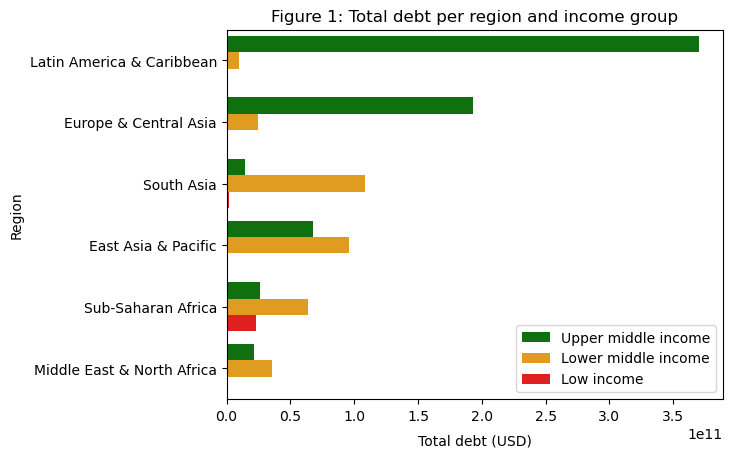

In [41]:
# plot debt_per_region_income_combination
sns.barplot(data=debt_per_region_income_combination, x='total_debt', y='region', hue='income_group', errorbar=None, palette=['green','orange','red'])
plt.title('Figure 1: Total debt per region and income group')
plt.xlabel('Total debt (USD)', labelpad=8.0)
plt.ylabel('Region')
plt.legend(title=False)
plt.show()

### What are the distinct debt indicators that have non-zero total debt?

In [43]:
# DISTINCT value is extracted to ignore duplicate rows

query = """
SELECT
    indicator_code,
    indicator_name,
    SUM(DISTINCT value) AS total_debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
GROUP BY
    indicator_code,
    indicator_name
HAVING total_debt <> 0
ORDER BY indicator_code;
"""

distinct_debt_indicators = read_gbq(query, project_id=project_id)

distinct_debt_indicators

Downloading: 100%|██████████|


,indicator_code,indicator_name,total_debt
0,DT.AMT.BLAT.CD,"PPG, bilateral (AMT, current US$)",1.738546e+11
1,DT.AMT.DLXF.CD,"Principal repayments on external debt, long-term (AMT, current US$)",1.361473e+12
2,DT.AMT.DPNG.CD,"Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)",5.012070e+11
3,DT.AMT.DPPG.CD,"Principal repayments on external debt, public and publicly guaranteed (PPG) (AMT, current US$)",8.602655e+11
4,DT.AMT.MLAT.CD,"PPG, multilateral (AMT, current US$)",2.515296e+11
5,DT.AMT.OFFT.CD,"PPG, official creditors (AMT, current US$)",4.253842e+11
6,DT.AMT.PBND.CD,"PPG, bonds (AMT, current US$)",2.851193e+11
7,DT.AMT.PCBK.CD,"PPG, commercial banks (AMT, current US$)",6.876301e+10
8,DT.AMT.PROP.CD,"PPG, other private creditors (AMT, current US$)",4.996780e+09
9,DT.AMT.PRVT.CD,"PPG, private creditors (AMT, current US$)",4.348813e+11


### Explore the series_summary table

In [45]:
query = """
SELECT *
FROM bigquery-public-data.world_bank_intl_debt.series_summary;
"""

series_summary = read_gbq(query, project_id=project_id)

series_summary.head(2)

Downloading: 100%|██████████|


,series_code,topic,indicator_name,short_definition,long_definition,unit_of_measure,periodicity,base_period,other_notes,aggregation_method,limitations_and_exceptions,notes_from_original_source,general_comments,source,statistical_concept_and_methodology,development_relevance,related_source_links,other_web_links,related_indicators,license_type
0,BM.GSR.TOTL.CD,"Economic Policy & Debt: Balance of payments: Current account: Goods, services & income","Imports of goods, services and primary income (current US$)","Imports of goods, services and primary income is the sum of goods (merchandise) imports, imports of (nonfactor) services and income (factor) payments. Data are in current U.S. dollars.","Imports of goods, services and income is the sum of goods (merchandise) imports, imports of (nonfactor) services and primary income (factor) payments. Data are in current U.S. dollars.",None,Annual,None,None,Gap-filled total,None,None,None,"International Monetary Fund, Balance of Payments Statistics Yearbook.",None,None,None,None,None,None
1,BN.CAB.XOKA.CD,Economic Policy & Debt: Balance of payments: Current account: Balances,Current account balance (current US$),"Current account balance shows the difference between the sum of exports and income receivable and the sum of imports and income payable (exports and imports refer to both goods and services, while income refers to both primary and secondary income).","Current account balance shows the difference between the sum of exports and income receivable and the sum of imports and income payable (exports and imports refer to both goods and services, while income refers to both primary and secondary income).",None,Annual,None,None,Sum,None,None,None,"International Monetary Fund, Balance of Payments Statistics Yearbook.",None,None,None,None,None,None


### What are the top 10 indicators in terms of total debt, and what are their definitions?

In [47]:
# DISTINCT value is extracted to ignore duplicate rows

query = """
SELECT
    indicator_code,
    t1.indicator_name,
    SUM(DISTINCT value) AS total_debt,
    short_definition
FROM bigquery-public-data.world_bank_intl_debt.international_debt AS t1
LEFT JOIN bigquery-public-data.world_bank_intl_debt.series_summary AS t2
ON t1.indicator_code = t2.series_code
WHERE
    (country_name NOT LIKE '%income%' 
    AND country_name NOT LIKE '%UN classification'
    AND country_name NOT LIKE 'IDA only'
    AND country_name NOT LIKE 'South Asia')
GROUP BY
    indicator_code,
    indicator_name,
    short_definition
ORDER BY total_debt DESC
LIMIT 10;
"""

highest_debt_indicators = read_gbq(query, project_id=project_id)

highest_debt_indicators

Downloading: 100%|██████████|


,indicator_code,indicator_name,total_debt,short_definition
0,DT.AMT.DLXF.CD,"Principal repayments on external debt, long-term (AMT, current US$)",2.652405e+11,"Principal repayments on long-term debt are actual amounts of principal (amortization) paid by the borrower in currency, goods, or services in the year specified. Long-term external debt is defined as debt that has an original or extended maturity of more than one year and that is owed to nonresidents by residents of an economy and repayable in currency, goods, or services. Data are in current U.S. dollars."
1,DT.AMT.DPPG.CD,"Principal repayments on external debt, public and publicly guaranteed (PPG) (AMT, current US$)",1.657962e+11,"Public and publicly guaranteed long-term debt are aggregated. Public debt is an external obligation of a public debtor, including the national government, a political subdivision (or an agency of either), and autonomous public bodies. Publicly guaranteed debt is an external obligation of a private debtor that is guaranteed for repayment by a public entity. Principal repayments are actual amounts of principal (amortization) paid by the borrower in currency, goods, or services in the year specified. Long-term external debt is defined as debt that has an original or extended maturity of more than one year and that is owed to nonresidents by residents of an economy and repayable in currency, goods, or services. Data are in current U.S. dollars."
2,DT.AMT.DPNG.CD,"Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)",9.944430e+10,"Private nonguaranteed external debt is an external obligation of a private debtor that is not guaranteed for repayment by a public entity. Principal repayments are actual amounts of principal (amortization) paid by the borrower in currency, goods, or services in the year specified. Long-term external debt is defined as debt that has an original or extended maturity of more than one year and that is owed to nonresidents by residents of an economy and repayable in currency, goods, or services. Data are in current U.S. dollars."
3,DT.AMT.PRVT.CD,"PPG, private creditors (AMT, current US$)",8.583962e+10,"Public and publicly guaranteed debt from private creditors include bonds that are either publicly issued or privately placed; commercial bank loans from private banks and other private financial institutions; and other private credits from manufacturers, exporters, and other suppliers of goods, and bank credits covered by a guarantee of an export credit agency. Principal repayments are actual amounts of principal (amortization) paid by the borrower in currency, goods, or services in the year specified. Data are in current U.S. dollars."
4,DT.AMT.OFFT.CD,"PPG, official creditors (AMT, current US$)",7.995661e+10,"Public and publicly guaranteed debt from official creditors includes loans from international organizations (multilateral loans) and loans from governments (bilateral loans). Loans from international organization include loans and credits from the World Bank, regional development banks, and other multilateral and intergovernmental agencies. Excluded are loans from funds administered by an international organization on behalf of a single donor government; these are classified as loans from governments. Government loans include loans from governments and their agencies (including central banks), loans from autonomous bodies, and direct loans from official export credit agencies. Principal repayments are actual amounts of principal (amortization) paid by the borrower in currency, goods, or services in the year specified. Data are in current U.S. dollars."
5,DT.INT.DLXF.CD,"Interest payments on external debt, long-term (INT, current US$)",7.986880e+10,"Interest payments on long-term debt are actual amounts of interest paid by the borrower in currency, goods, or services in the year specified. Long-term external debt is defined as debt that has an original or extended maturity of more than 

### Which country has the highest debt in the "DT.AMT.DLXF.CD" category?

In [49]:
query = """
SELECT
    country_name,
    indicator_name,
    value AS debt
FROM bigquery-public-data.world_bank_intl_debt.international_debt
WHERE
    value = (SELECT
            MAX(value)
            FROM bigquery-public-data.world_bank_intl_debt.international_debt
            WHERE
                (indicator_code = 'DT.AMT.DLXF.CD')
                AND
                (country_name NOT LIKE '%income%' 
                AND country_name NOT LIKE '%UN classification'
                AND country_name NOT LIKE 'IDA only'
                AND country_name NOT LIKE 'South Asia'))
LIMIT 1;
"""

highest_principal_repayment_long_term = read_gbq(query, project_id=project_id)

highest_principal_repayment_long_term

Downloading: 100%|██████████|


,country_name,indicator_name,debt
0,India,"Principal repayments on external debt, long-term (AMT, current US$)",2.420742e+10
